 11월 5일 (화요일)

필요한 library 정리

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilterb

# 1. Phasor

In [22]:
# parameter setting
amp = 1          # range [0.0, 1.0]      / '진폭'amplitude = 1 (-1에서 1까지)
sr = 10000       # sampling rate, Hz     / 1초에 몇개의 숫자로 해서 음질상 얼마나 고해상도인지.=> "음질의 해상도" ,1초에 만개의 숫자로 표현
dur = 0.5        # in seconds            / 몇초동안 소리가 나는지      
freq = 100.0     # sine frequency, Hz    / 1초에 몇번 왔다갔다 하는가, '총 몇바퀴가 되어야 하는가'
                     # Hz를 높게 해주면 소리 높아져서 더 잘 들림.

sampling rate : 1초동안 들어갈 수 있는 time ticks

In [ ]:
t  0.0001 0.0002 0.0003  ... 0.5000     #duration이 0.5이므로 0.5초까지.끝이 duration이 되는 것.

* time을 먼저 만들어야 함 (0.5000가 우리가 만들고자 하는 time)

해상도 같은 것(time을 얼만큼 잘게 쪼개는가). 1초동안 몇개의 time ticks가 들어갈까.

0.0001 -> 총 10000개 들어감. (만약, 0.001이라면 1000개 들어가는 것)

* sr와 duration만 있으면 time을 만들어낼 수 있음
 
-> 끝이 'duration'이 되는 것/ sr(sampling rate)이 10000이므로 1초에 총 10000개가 들어가는 개념

-> amplitude진폭와 frequency의 개념은 아직 들어가 있지 않음


In [ ]:
t = np.arange(1,sr)  # 1에서 1999까지 만들어짐

In [ ]:
t = np.arange(1,sr+1)  #1에서 10000까지 만들어짐

만약 duration이 1초라면 1초동안 이 sr로 만들어내는 숫자가 time tick과 같을 것(그러나 0.5초임 )

In [ ]:
t = np.arange(1,sr*dur+1)  #1부터 5000까지의 time tick의 index만 만든 것. 실제의 time은 아님.

sr에 duration을 곱하면 5000까지 만들어짐 / 0.5까지 time tick을 만들어줌. (가장 마지막은 사용하지 않으므로 '+1'해줘야 함.)

In [23]:
# generate time
t = np.arange(1, sr * dur+1)/sr  #sr로 나누면 , time tick이 만들어짐

1부터 5000까지 만든 것을 sr(10000)로 나누면, 진짜 time tick이 만들어지는 것.

10000(만)분의 1(0.0001)초부터 0.5초까지 만들어지는 셈

-> 1/10000초, 2/10000초, 3/10000초, ... , 5000/10000(0.5)초

# ㄴ중요

In [24]:
t  #time을 만듦

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

실제로 time이 만들어졌는지 확인. array(일차원 벡터)로 만들어짐.

* e-0.4 = 1/10000 (10의 4승 분의 1 = 10000만분의 일), e-0.1 = 1/10(10의 1승 분의 1 = 10분의 1)

1 x e-0.4 = '1/10000초',  2 x e-0.4 = '2/10000초',..., 4.998 x e-0.1 = '0.4998초',  4.999 x e-0.1 = '0.4999초',  5 x e-0.1 = '0.5초'

In [ ]:
# time이 있어야 실체의 sound를 만들어낼 수 있음 / 실제 필요한 것은 세타(θ)값,θ에 들어가는 각도값을 phase라고 함.

# time을 먼저 만들고, 거기에 phase를 연동시켜줘야 함.(아래의 방법)
    # time개념과 phase개념(θ,각도)이 동시에 들어가는 것.

In [25]:
# generate phase
theta = t * 2*np.pi * freq   

* time에 2파이를 곱함 (np.pi: numpy 속에 정의되어 있는 파이 값, 그냥 '상수값 파이')

* sr을 10000으로 해서, time이 0초에서 1초까지 만들어졌다고 하면, 1초에서의 time값은 1. 여기에 2파이를 곱하면 '2파이'가 됨
 
 '0초~ 1초'까지 있는데 2파이를 곱하면 '0파이~ 2파이'가 되는 것저 = 단순히'1바퀴' 도는 것

* frequency('총 몇바퀴'되어야 되는가에 대한 정의)를 곱해줌. (freq가 '1'이라면 그냥 2파이만 곱한채 '1바퀴' 도는 것)
 
  -> '2파이가 1초동안 총 몇개가 있어야 되는가'-> 'frequency가 100이라면 총 100바퀴를 돌아라'를 의미

# ㄴ중요

time먼저 만들고 phase(각도)를 연동시켜줌. 동시(시간과 각도의 개념이 동시에)에 들어가는 것

In [26]:
# generate signal by cosine-phasor
s = np.sin(theta)

* np에 정의된 sin의 입력값으로 theta를 넣어줌
 
* 문제
 
 time의 벡타(숫자의 갯수)의 size와 theta의 벡타의 size가 같은가?? 같다!! 
 
 =>'time'을 '1/10000초~5000/10000초'까지 만듦 -> 총 5000개의 time의 벡타를 만듦. 
 
 => theta는 이 time에 2파이와 freq.를 곱한것일 뿐 -> 똑같은 갯수의 벡타가 theta에 들어있는 것.

<IPython.core.display.Javascript object>


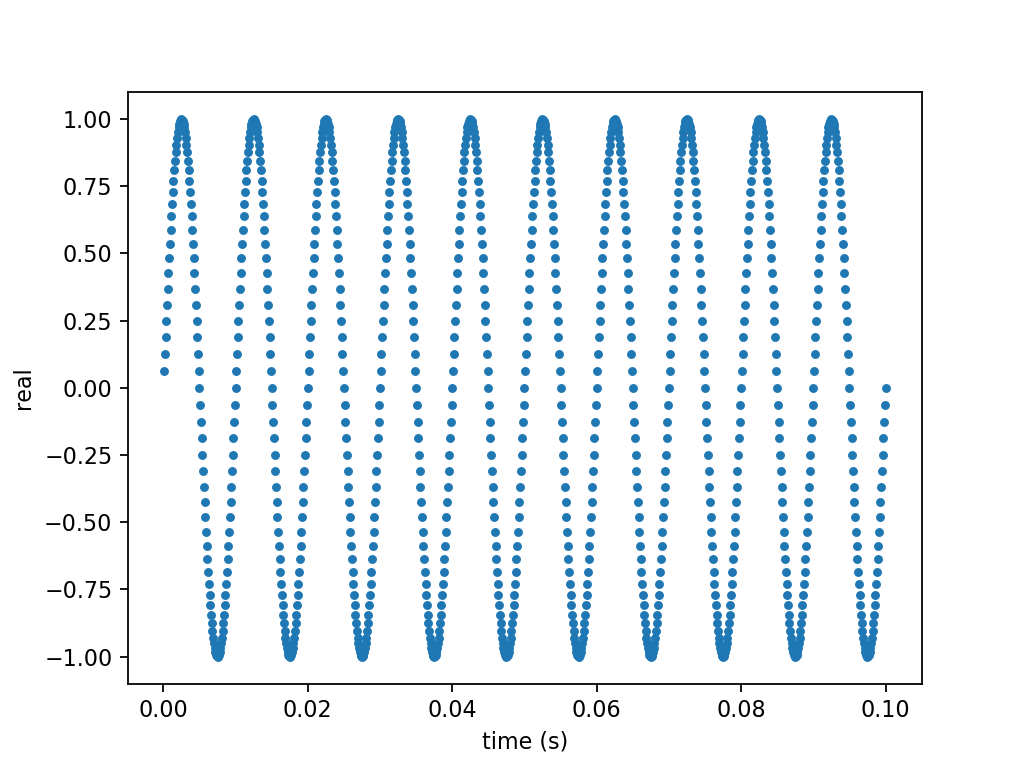

Text(0, 0.5, 'real')

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)           # 그림을 만들 준비하는 것
ax.plot(t[0:1000], s[0:1000], '.')  # 이 plot이라는 함수는 두개의 입력값('time',sin의 결과값인 's')을 받음-> x와 y로 받아 plotting. 
                                      #세번째 입력값인 '.(dot)'는 점(dot)로 plotting하라는 의미
    # (만든 time 5000개 중에 1000개만 plotting하라/ s도 1000개만 - sine 곡선으로 나타남.0부터 시작.)
ax.set_xlabel('time (s)')           # label을 정하는 것
ax.set_ylabel('real')                  # x label은 'time'으로, y label은 'real'로 하라.

In [28]:
# generate signal by complex-phasor
c = np.exp(theta*1j)        #오일러 phasor한 부분 

오일러 phasor한 부분

exp는 오일러 공식의 'e'에 해당하는 부분

<IPython.core.display.Javascript object>


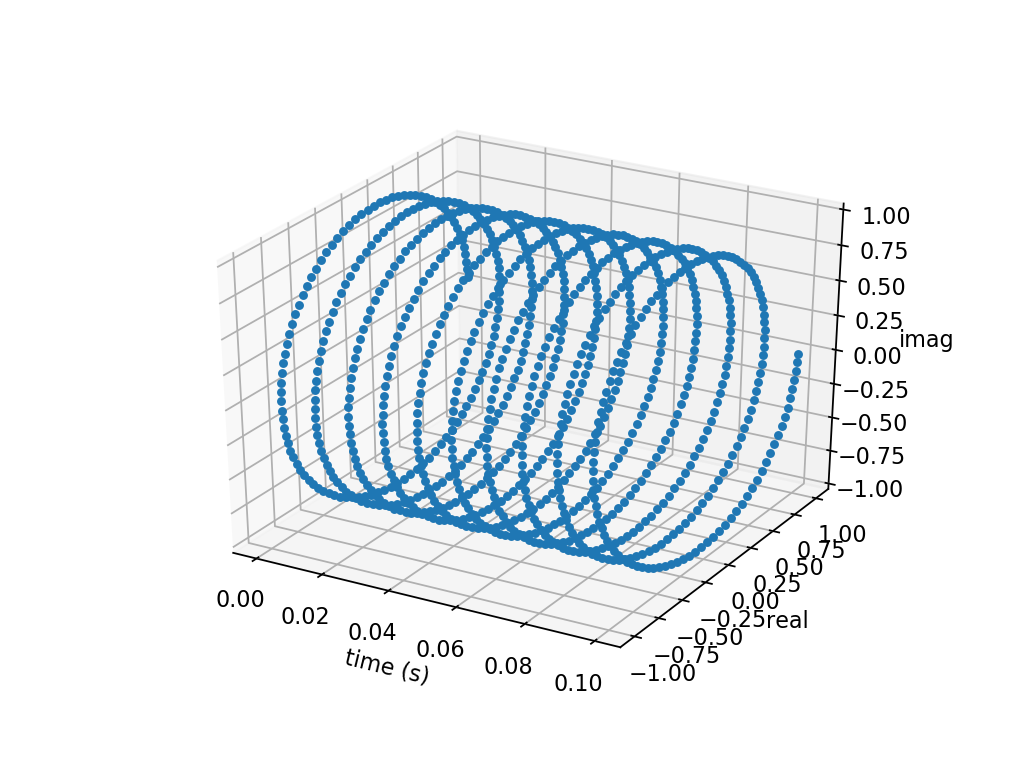

Text(0.5, 0, 'imag')

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

ㄴ> 실수(real) a와 허수(imaginary) b

In [30]:
ipd.Audio(s, rate=sr)   
# play하는 함수, 정의내린 's' 값과 'sr'값을 적어줘야 함.

* audio를 play하기 위해선 ipd를  import해야함

* s 대신 c.imah나 c.real 넣어도 오디오 출력됨


In [31]:
ipd.Audio(c.imag, rate=sr)

In [32]:
ipd.Audio(c.real, rate=sr)

# 진도 여기까지 

# -------------------------------------------------------------------------------------------------------------

# 2. Generate pulse train

In [ ]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

In [ ]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [ ]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# 3. load wav

In [ ]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# 4. Fourier tranform

In [ ]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# 5. define helper functions

In [ ]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# 6. preprocessing signal

In [ ]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

In [ ]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

In [ ]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);